In [ ]:
## 3 observable trends
#### Ride sharing is more prominant in urban areas containing the majority of drivers, rides, and total fares.
#### Ride sharing is least popular in Rural areas. 
#### Average cost per fare is greater in rural environments vs the more densly populated suburban and urban areas.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

combined_df = pd.merge(city_df, ride_df, how='outer', on='city')
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [14]:
# Obtain the x and y coordinates for each of the three city types

# break by type
urban= combined_df.loc[(combined_df["type"]=="Urban")]
suburban= combined_df.loc[(combined_df["type"]=="Suburban")]
rural= combined_df.loc[(combined_df["type"]=="Rural")]

# average fares for Y coordinates
urbanfares= urban.groupby("city")['fare'].mean()
subfares= suburban.groupby("city")['fare'].mean()
ruralfares= rural.groupby("city")['fare'].mean()

#total rides for x coordinates
urbanrides= urban.groupby("city")['driver_count'].value_counts()
subrides= suburban.groupby("city")['driver_count'].value_counts()
ruralrides= rural.groupby("city")['driver_count'].value_counts()

#scatter circle is number of drivers
urbandrive = urban.groupby('city').count()['ride_id']
subdrive = suburban.groupby('city').count()['ride_id']
ruraldrive = rural.groupby('city').count()['ride_id']

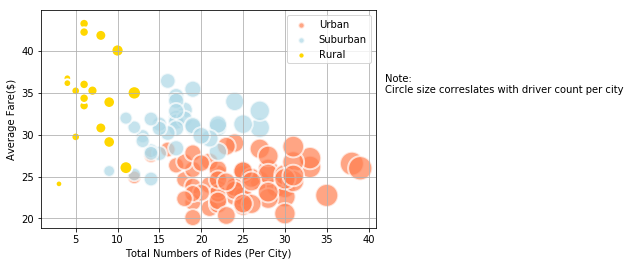

In [20]:
# # Build the scatter plots for each city types
plt.scatter(urbanrides, urbanfares, s=urbandrive*15,
            marker ='o', facecolors ="coral", linewidth=2.0, edgecolors='white',alpha = .7, label="Urban")

plt.scatter(subrides, subfares, s=subdrive*15,
            marker ='o', facecolors ="lightblue", linewidth=2.0, edgecolors='white',alpha = .7, label="Suburban")

plt.scatter(ruralrides, ruralfares, s=ruraldrive*15,
            marker ='o', facecolors ="gold", linewidth=2.0, edgecolors='white',alpha = 1, label="Rural")

# labels
plt.ylabel("Average Fare($)")
plt.xlabel("Total Numbers of Rides (Per City)")

# Create a rock star
plt.legend(loc='upper right')

#resize legend
legend=plt.legend(loc='upper right')
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# add text and grid
plt.text( 42, 35, "Note: \nCircle size correslates with driver count per city")
plt.grid()
plt.show()

In [4]:
# # Save Figure
plt.savefig("Bubble.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

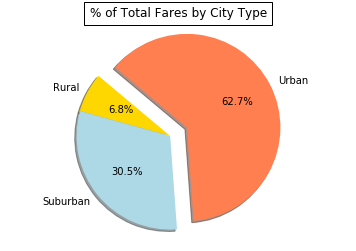

In [5]:
# Calculate Type Percents
totalfares= combined_df.groupby(['type'])['fare'].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightblue", "coral"]
explode= (0, 0, 0.2)

plt.pie(totalfares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Fares by City Type', bbox={'facecolor':'white', 'pad':5})
plt.axis("equal")

# Save Figure
plt.savefig("FaresPie.png")

#show
plt.show()

## Total Rides by City Type

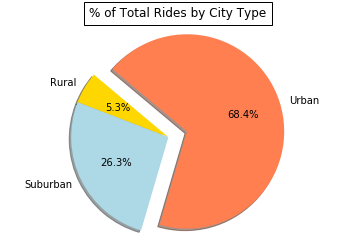

In [6]:
# Calculate Type Percents
grouptype=combined_df.groupby(['type'])
totalrides= grouptype['ride_id'].count()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightblue", "coral"]
explode= (0, 0, 0.2)

plt.pie(totalrides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Rides by City Type', bbox={'facecolor':'white', 'pad':5})
plt.axis("equal")

# Save Figure
plt.savefig("RidesPie.png")

#show
plt.show()

## Total Drivers by City Type

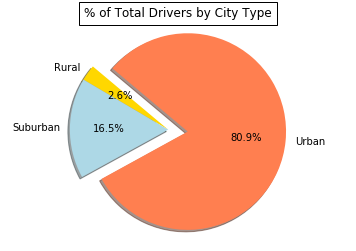

In [7]:
# Calculate Type Percents
groupDC= city_df.groupby(["type"])

totaldrivers= groupDC['driver_count'].sum()


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightblue", "coral"]
explode= (.0, 0, 0.2)

plt.pie(totaldrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of Total Drivers by City Type', bbox={'facecolor':'white', 'pad':5})
plt.axis("equal")

# Save Figure
plt.savefig("DriversPie.png")

#show
plt.show()